In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp



In [40]:
# Variables symboliques
p1, p2, y1, y2 = sp.symbols('p1 p2 y1 y2')

# Fonction d'entropie croisée pour 2 classes
L = - (y1*sp.log(p1) + y2*sp.log(p2))

# Calcul des gradients
grad_p1 = sp.diff(L, p1)
grad_p2 = sp.diff(L, p2)

grad_p1, grad_p2

H = sp.hessian(L, (p1, p2))
H


Matrix([
[y1/p1**2,        0],
[       0, y2/p2**2]])

In [24]:
# Hessienne pour MSE
H_mse = sp.hessian(mse_expr, (w1, w2))
print("Hessienne MSE =", H_mse)

# Hessienne pour log-loss
H_log = sp.hessian(log_loss, (w1, w2))
print("Hessienne Log-loss =", H_log)


Hessienne MSE = Matrix([[2*x1**2, 2*x1*x2], [2*x1*x2, 2*x2**2]])
Hessienne Log-loss = Matrix([[x1**2*y*exp(-w1*x1 - w2*x2)/(exp(-w1*x1 - w2*x2) + 1) - x1**2*y*exp(-2*w1*x1 - 2*w2*x2)/(exp(-w1*x1 - w2*x2) + 1)**2 - x1**2*(1 - y)*exp(-w1*x1 - w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**2) + 2*x1**2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**3) + x1**2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))**2*(exp(-w1*x1 - w2*x2) + 1)**4), x1*x2*y*exp(-w1*x1 - w2*x2)/(exp(-w1*x1 - w2*x2) + 1) - x1*x2*y*exp(-2*w1*x1 - 2*w2*x2)/(exp(-w1*x1 - w2*x2) + 1)**2 - x1*x2*(1 - y)*exp(-w1*x1 - w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**2) + 2*x1*x2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**3) + x1*x2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))**2*(exp(-w1*x1 - w2*x2) + 1)**4)], [x1*x2*y*exp(-w1*x1 - w2*x2)/(exp(-w

In [33]:
# Iris pour classification
IRIS_PATH  = "./data/iris/iris.data"
iris_cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df_iris = pd.read_csv(IRIS_PATH, header=None, names=iris_cols)

# On prend deux attributs pour simplifier
X_iris = df_iris[['sepal_length','sepal_width']].head(50)
y_iris = df_iris['class'].head(50)

# Wine Quality pour régression
WINE_PATH  = "./data/wine+quality/winequality-red.csv"
df_wine = pd.read_csv(WINE_PATH, sep=';')
X_wine = df_wine[['fixed acidity', 'volatile acidity']].head(50)
y_wine = df_wine['quality'].head(50)

# Affichage 
print("Iris sample:\n", X_iris.head())
print("\nWine sample:\n", X_wine.head())

Iris sample:
    sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

Wine sample:
    fixed acidity  volatile acidity
0            7.4              0.70
1            7.8              0.88
2            7.8              0.76
3           11.2              0.28
4            7.4              0.70


In [32]:
# Variables symboliques pour 2 classes 
p1, p2, y1, y2 = sp.symbols('p1 p2 y1 y2')
L = - (y1*sp.log(p1) + y2*sp.log(p2))

# Gradient de l'entropie croisee categorielle
grad_p1 = sp.diff(L, p1)
grad_p2 = sp.diff(L, p2)
print("Gradient par rapport à p1 et p2 :", grad_p1, grad_p2)

Gradient par rapport à p1 et p2 : -y1/p1 -y2/p2


In [34]:
#convexite
H = sp.hessian(L, (p1, p2))
print("Hessienne :\n", H)


Hessienne :
 Matrix([[y1/p1**2, 0], [0, y2/p2**2]])


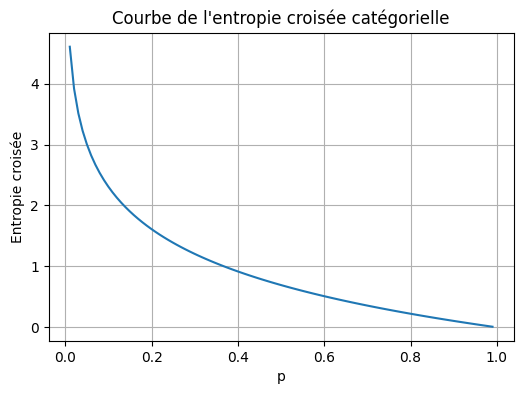

In [36]:
#  Courbe
p = sp.symbols('p')
y_val = 1  # Exemple : observation de classe 1
L_sym = - (y_val*sp.log(p) + (1-y_val)*sp.log(1-p))
L_func = sp.lambdify(p, L_sym, 'numpy')

p_vals = np.linspace(0.01, 0.99, 100)
plt.figure(figsize=(6,4))
plt.plot(p_vals, L_func(p_vals))
plt.xlabel('p')
plt.ylabel('Entropie croisée')
plt.title('Courbe de l\'entropie croisée catégorielle')
plt.grid(True)
plt.show()


In [37]:
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5  # Point choisi

# Equation ellipse
ellipse = x**2/a**2 + y**2/b**2 - 1

# Gradient
grad = [sp.diff(ellipse, var) for var in (x, y)]

# Equation tangente : grad . (X - X0) = 0
tangent_eq = grad[0]*(x - x0_val) + grad[1]*(y - y0_val)
print("Equation de la tangente :", tangent_eq)

Equation de la tangente : x*(x - 1)/2 + 2*y*(y - 0.5)


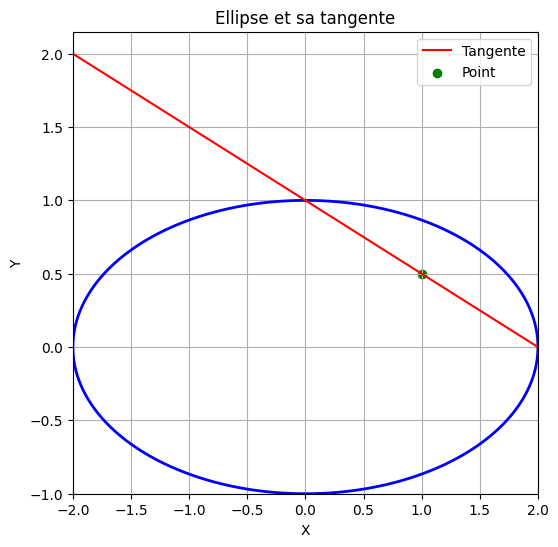

In [38]:
# Visualisation de l'ellipse et de la tangente

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 1, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = X_grid**2/a**2 + Y_grid**2/b**2 - 1

plt.figure(figsize=(6,6))
plt.contour(X_grid, Y_grid, Z, levels=[0], colors='blue', linewidths=2)  # ellipse

# Tangente : y = -(grad_x/grad_y)*(x - x0) + y0
grad_x = 2*x0_val/a**2
grad_y = 2*y0_val/b**2
y_tangent = -(grad_x/grad_y)*(x_vals - x0_val) + y0_val
plt.plot(x_vals, y_tangent, 'r', label='Tangente')
plt.scatter([x0_val], [y0_val], color='green', label='Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ellipse et sa tangente')
plt.legend()
plt.grid(True)
plt.show()

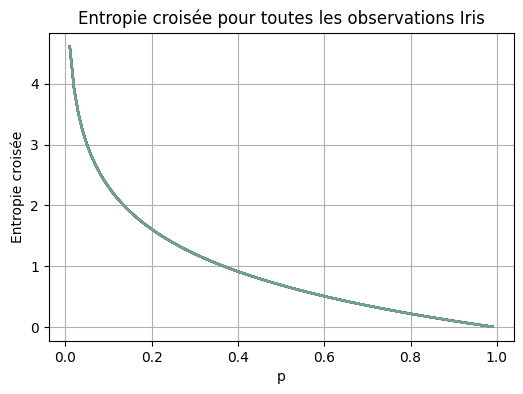

In [39]:
#  visualisation entropie croisée sur toutes les observations Iris
y_encoded = (y_iris == 'Iris-setosa').astype(int)

plt.figure(figsize=(6,4))
for yi in y_encoded:
    L_func_i = sp.lambdify(p, - (yi*sp.log(p) + (1-yi)*sp.log(1-p)), 'numpy')
    plt.plot(p_vals, L_func_i(p_vals), alpha=0.5)
plt.xlabel('p')
plt.ylabel('Entropie croisée')
plt.title('Entropie croisée pour toutes les observations Iris')
plt.grid(True)
plt.show()